<a href="https://colab.research.google.com/github/trangthuy38/Projects/blob/main/Building_models_to_predict_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer churn refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. It represents the rate at which customers stop using a company's products or services within a specific period. Churn is an important metric for businesses as it directly impacts revenue, growth, and customer retention.

In the context of the Churn dataset, the churn label indicates whether a customer has churned or not. A churned customer is one who has decided to discontinue their subscription or usage of the company's services. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.

Understanding customer churn is crucial for businesses to identify patterns, factors, and indicators that contribute to customer attrition. By analyzing churn behavior and its associated features, companies can develop strategies to retain existing customers, improve customer satisfaction, and reduce customer turnover. Predictive modeling techniques can also be applied to forecast and proactively address potential churn, enabling companies to take proactive measures to retain at-risk customers.

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [75]:
train = pd.read_csv("customer_churn_dataset-training-master.csv")

In [76]:
test = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [77]:
train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [78]:
test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [79]:
train.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [80]:
test.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [81]:
missing_rows = train[train.isnull().any(axis=1)]
missing_rows

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
train_duplicated = train[train.duplicated(keep=False)]
train_duplicated

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [83]:
test_duplicated = test[test.duplicated(keep=False)]
test_duplicated

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [84]:
train.dropna(inplace=True)

In [85]:
train.drop_duplicates(inplace=True)

In [86]:
train.reset_index(drop=True)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440827,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440828,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440829,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440830,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [89]:
train.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [90]:
test.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


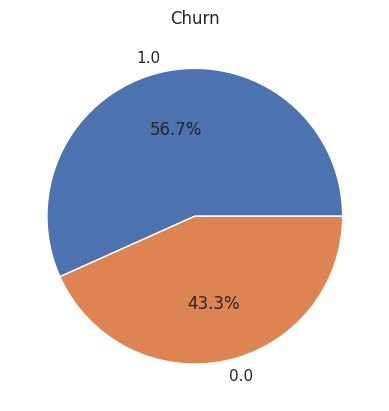

In [91]:
churn_counts = train['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title("Churn")
plt.show()

The customer churn rate is very high, accounting for more than half of the total number of customers

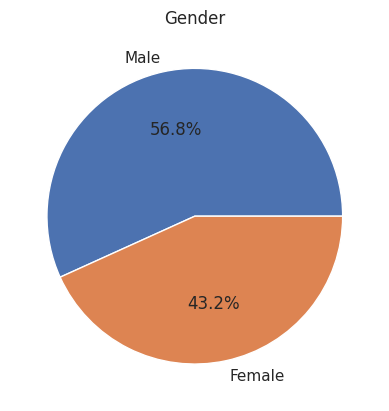

In [92]:
gender_counts = train['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender")
plt.show()

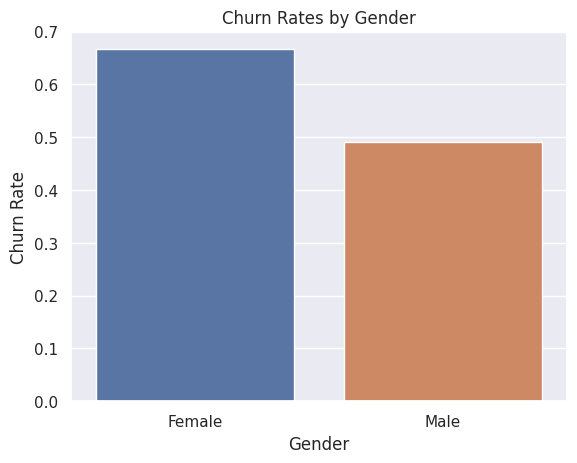

In [93]:
gender_churn_rate = train.groupby('Gender')['Churn'].mean()
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values)
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Gender')
plt.show()

More than half of customers are male, but the churn rate of female customers is higher than that of male customers

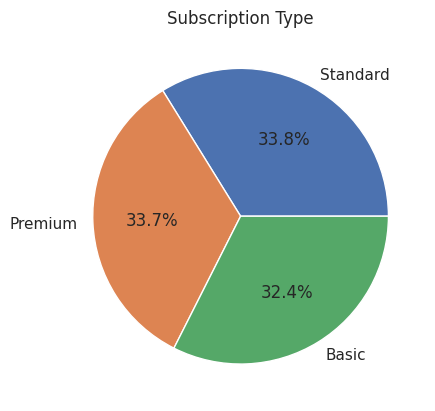

In [94]:
subscription_counts = train['Subscription Type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%')
plt.title("Subscription Type")
plt.show()

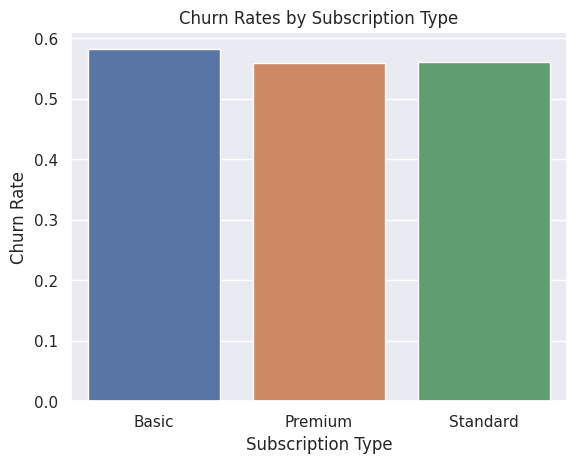

In [95]:
subscription_churn_rate = train.groupby('Subscription Type')['Churn'].mean()
sns.barplot(x=subscription_churn_rate.index, y=subscription_churn_rate.values)
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Subscription Type')
plt.show()

Different subscription types have roughly equal customer rates, and customer churn rates among subscription types are also similar

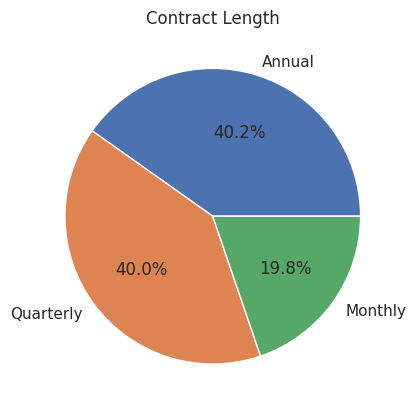

In [96]:
contract_counts = train['Contract Length'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%')
plt.title("Contract Length")
plt.show()

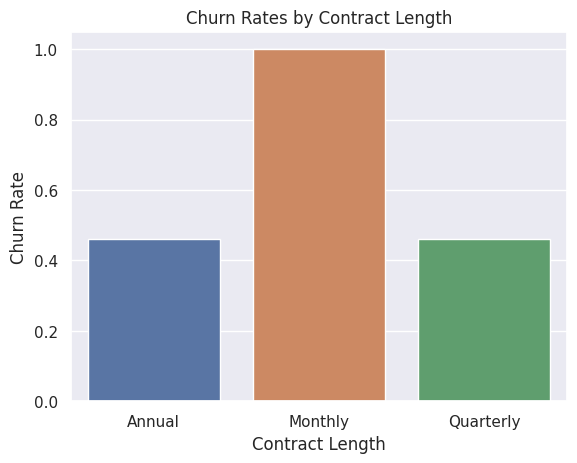

In [97]:
contract_churn_rate = train.groupby('Contract Length')['Churn'].mean()
sns.barplot(x=contract_churn_rate.index, y=contract_churn_rate.values)
plt.xlabel("Contract Length")
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Contract Length')
plt.show()

Annual and quarterly contracts have a higher customer rate than monthly contracts, nearly half of customers with annual and quarterly contracts churn, but all customers with monthly contracts churn

Text(0.5, 1.0, 'Distribution of Ages Among Customers')

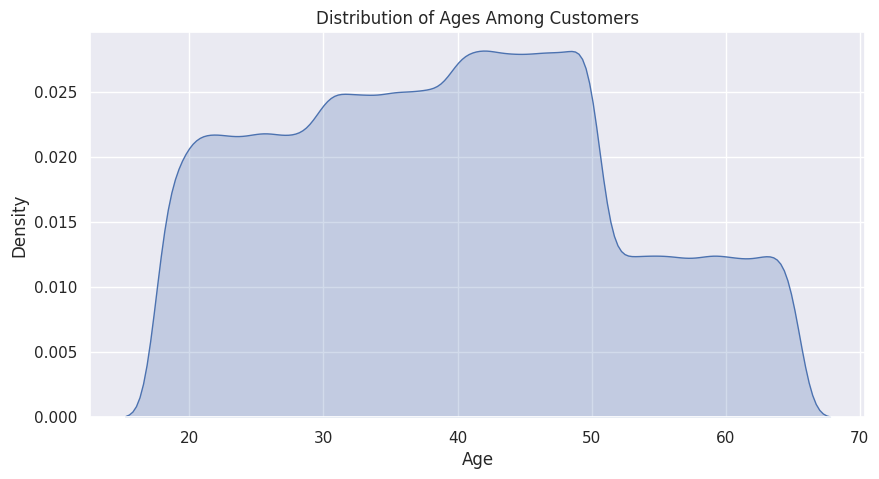

In [98]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = train , x = train.Age , fill = True, common_norm=False )
plt.title('Distribution of Ages Among Customers')

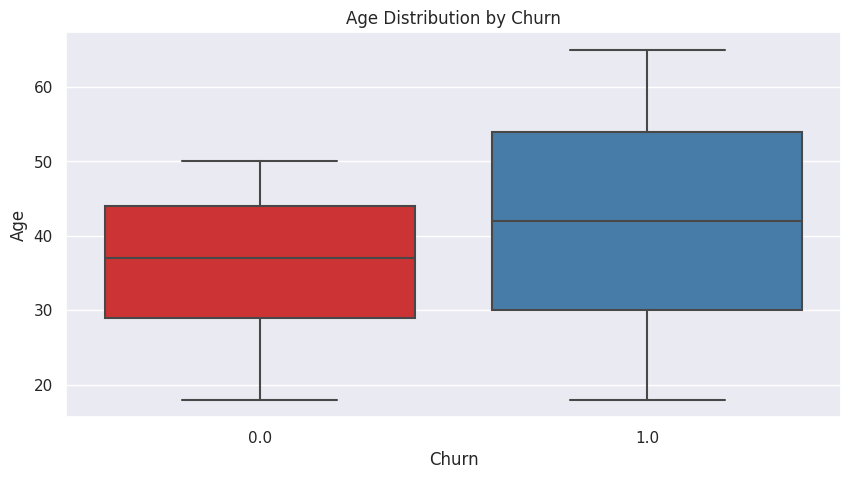

In [99]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Age', data=train, palette='Set1')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age Distribution by Churn')
plt.show()

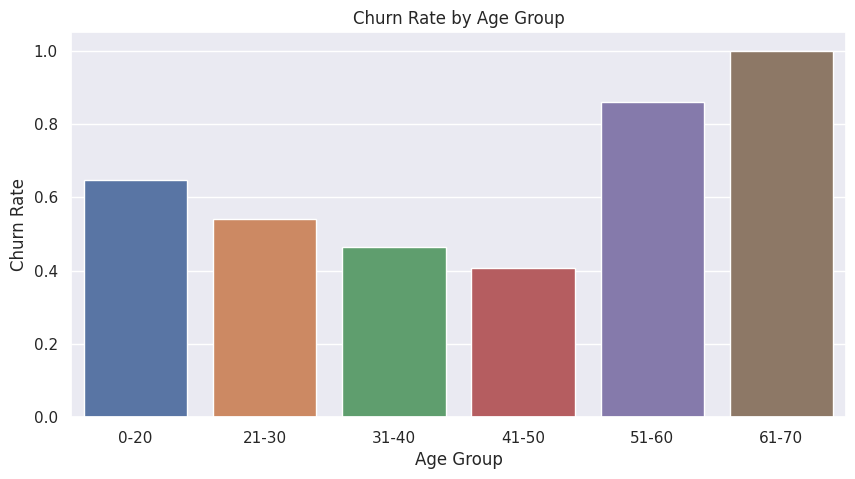

In [100]:
age_bins = [0, 20, 30, 40, 50, 60, 70]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70']
train['AgeGroup'] = pd.cut(train['Age'], bins= age_bins, labels= age_labels, right=False)
age_churn_rate = train.groupby('AgeGroup')['Churn'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values)
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.show()

The age of customers is distributed quite evenly, focusing mainly between 20 - 50 years old, the majority of customers aged 51 - 60 have left, all customers over the age of 60 have left, customers in the remaining age groups have left at a rate of about 0.5

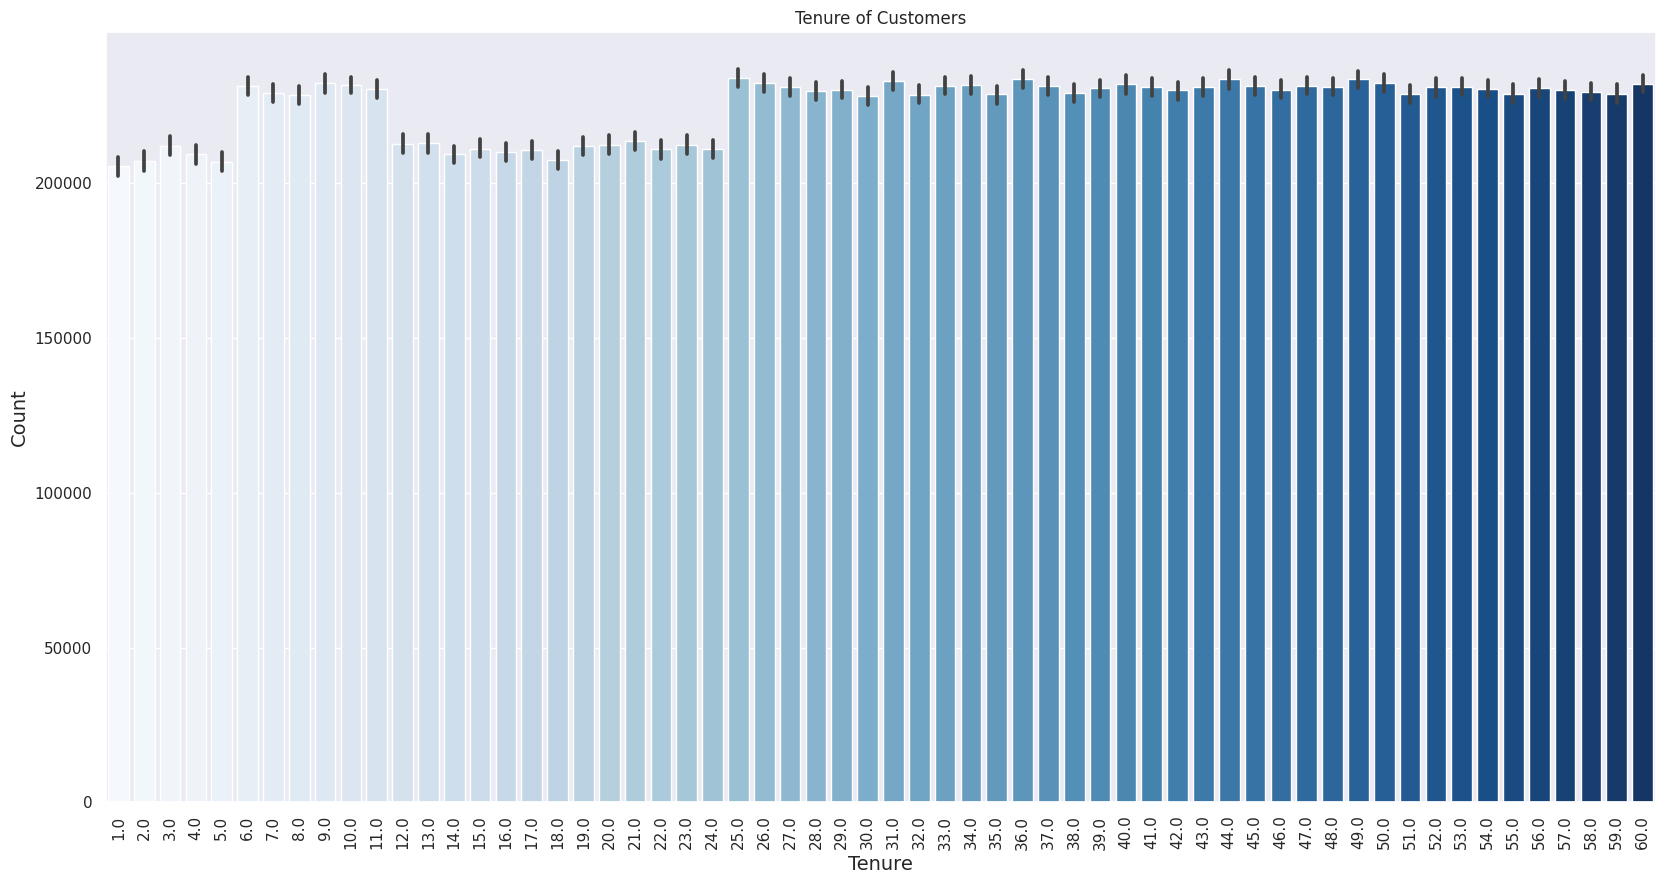

In [101]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Tenure', y='CustomerID', data=train, palette='Blues')
plt.xlabel('Tenure',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Tenure of Customers')
plt.xticks(rotation=90)
plt.show()

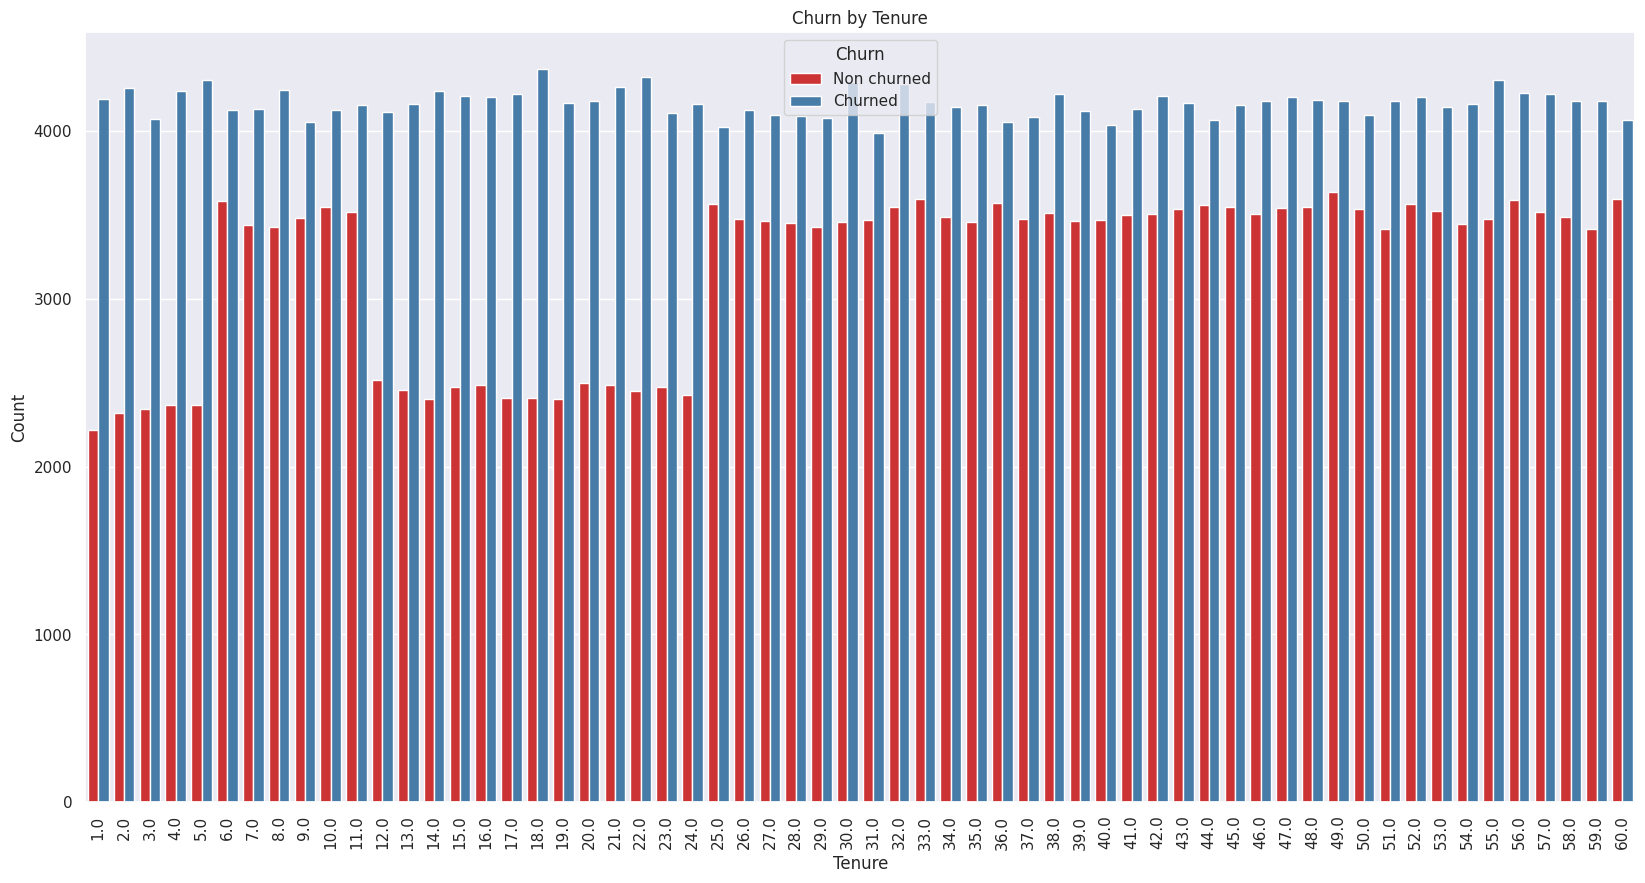

In [102]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Tenure', hue='Churn', data=train, palette='Set1')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Non churned', 'Churned'])
plt.title('Churn by Tenure')
plt.xticks(rotation=90)
plt.show()

Customer tenures are distributed quite evenly, customers with tenures between 1-5 and 12-24 have fewer customers staying than other groups

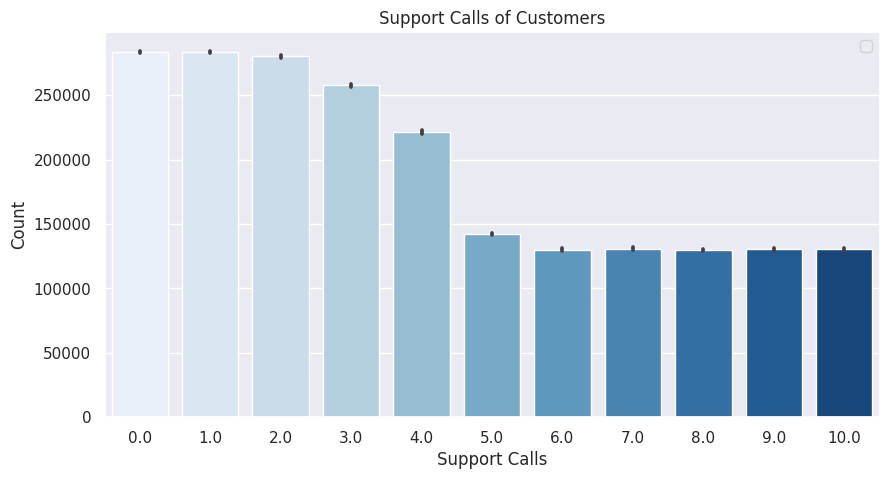

In [103]:
plt.figure(figsize = (10,5))
sns.barplot(x='Support Calls', y='CustomerID', data=train, palette='Blues')
plt.xlabel('Support Calls')
plt.ylabel('Count')
plt.title('Support Calls of Customers')
plt.legend()
plt.show()

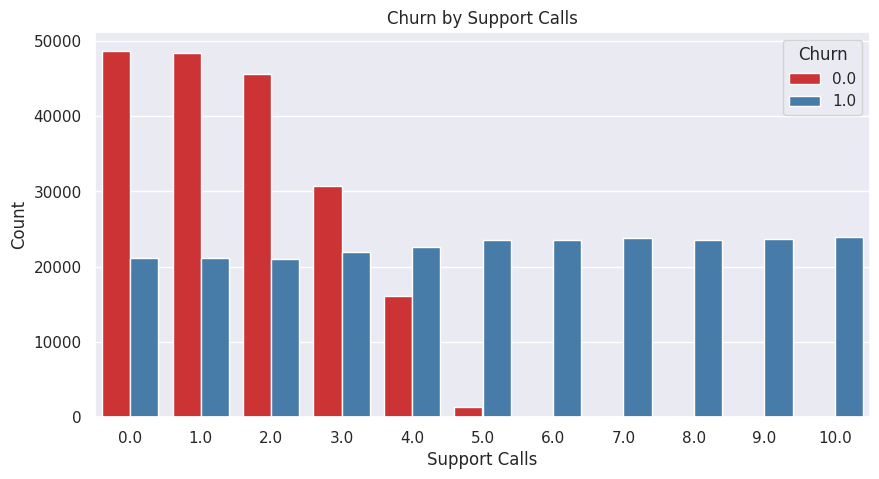

In [104]:
plt.figure(figsize = (10,5))
sns.countplot(data = train , x = 'Support Calls' , hue = 'Churn', palette ='Set1')
plt.xlabel('Support Calls')
plt.ylabel('Count')
plt.title('Churn by Support Calls')
plt.show()

Customers with a number of support calls from 0 to 3 have a low churn rate, but customers with a number of support calls greater than 5 leave completely.

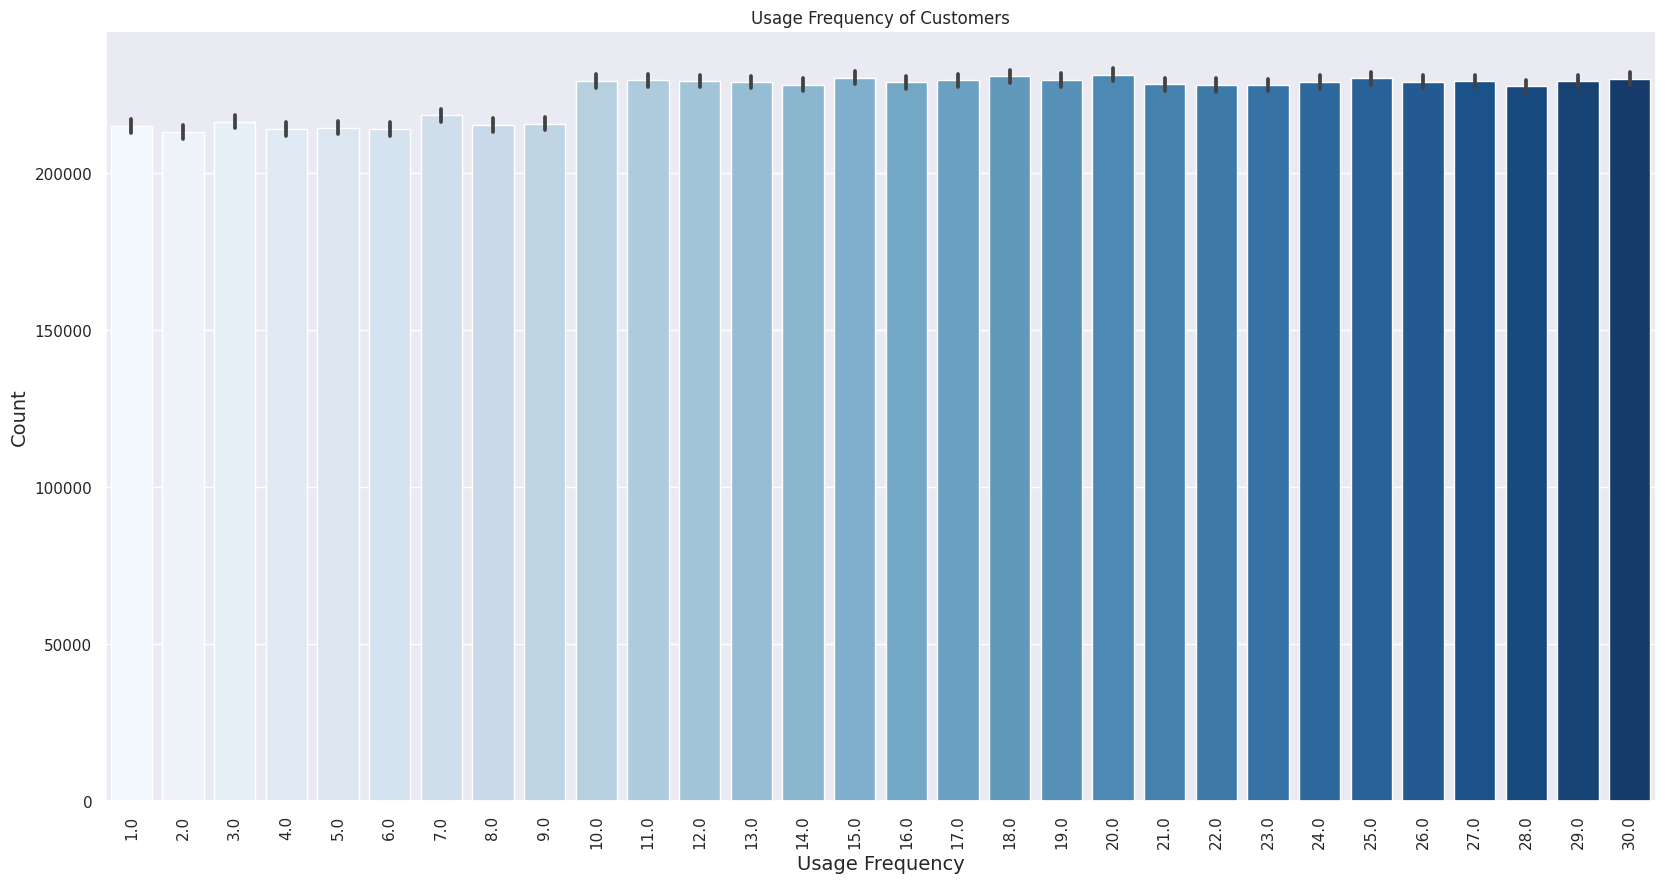

In [105]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Usage Frequency', y='CustomerID', data=train, palette='Blues')
plt.xlabel('Usage Frequency',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Usage Frequency of Customers')
plt.xticks(rotation=90)
plt.show()

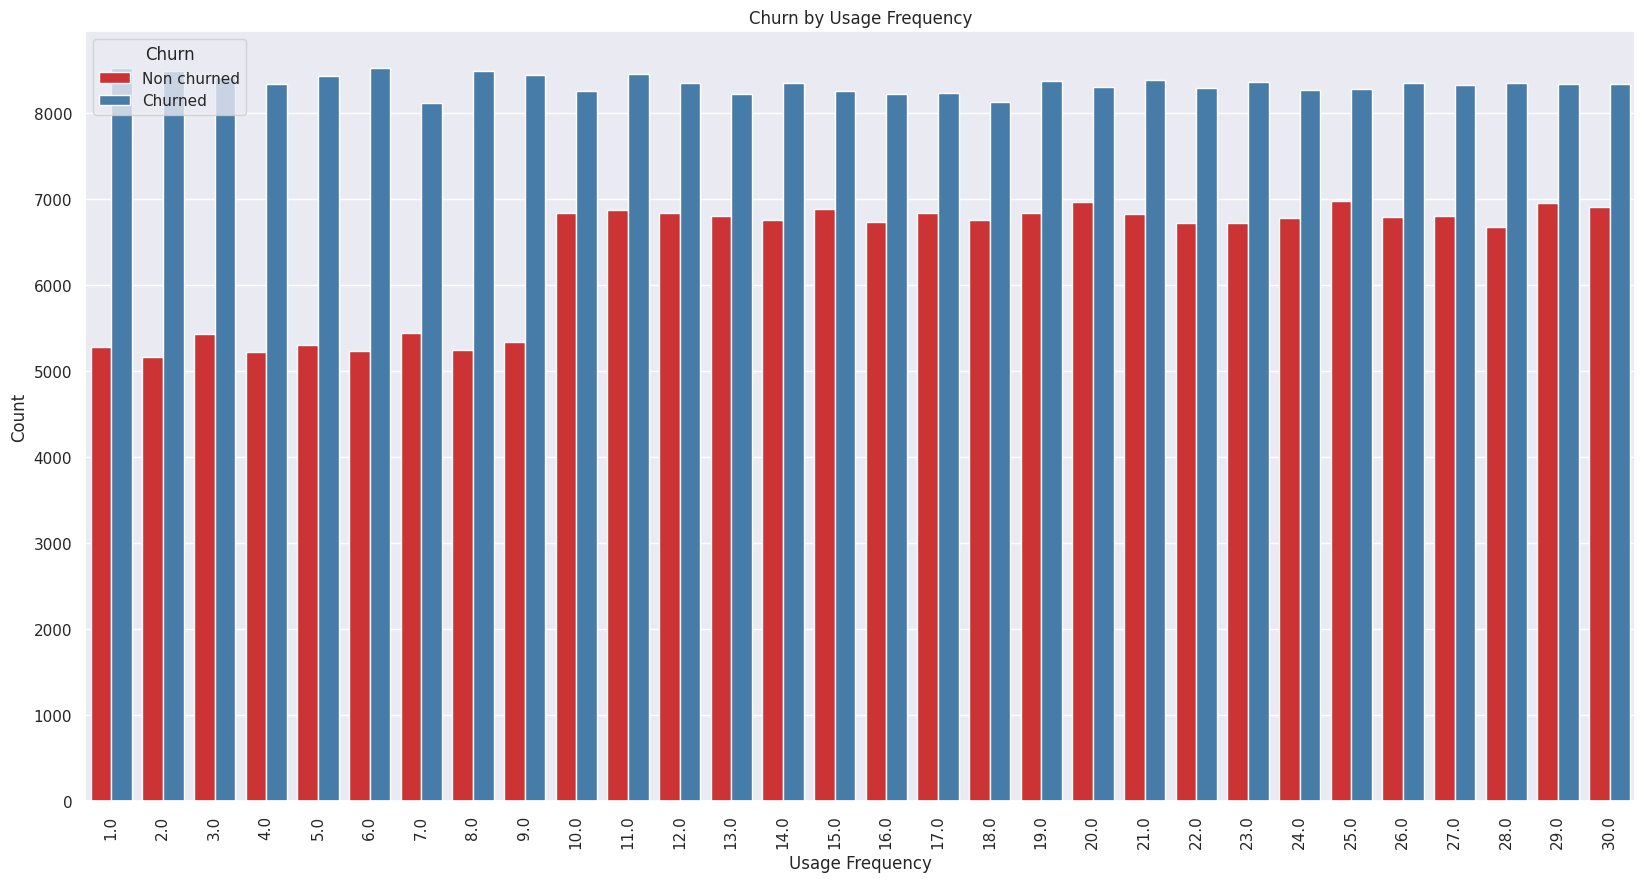

In [106]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Usage Frequency', hue='Churn', data=train, palette='Set1')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Non churned', 'Churned'])
plt.title('Churn by Usage Frequency')
plt.xticks(rotation=90)
plt.show()

Usage frequency is distributed quite evenly and stably, the number of customers leaving is quite even at different usage frequencies, frequencies in the range of 0 - 10 have fewer customers staying compared to other groups

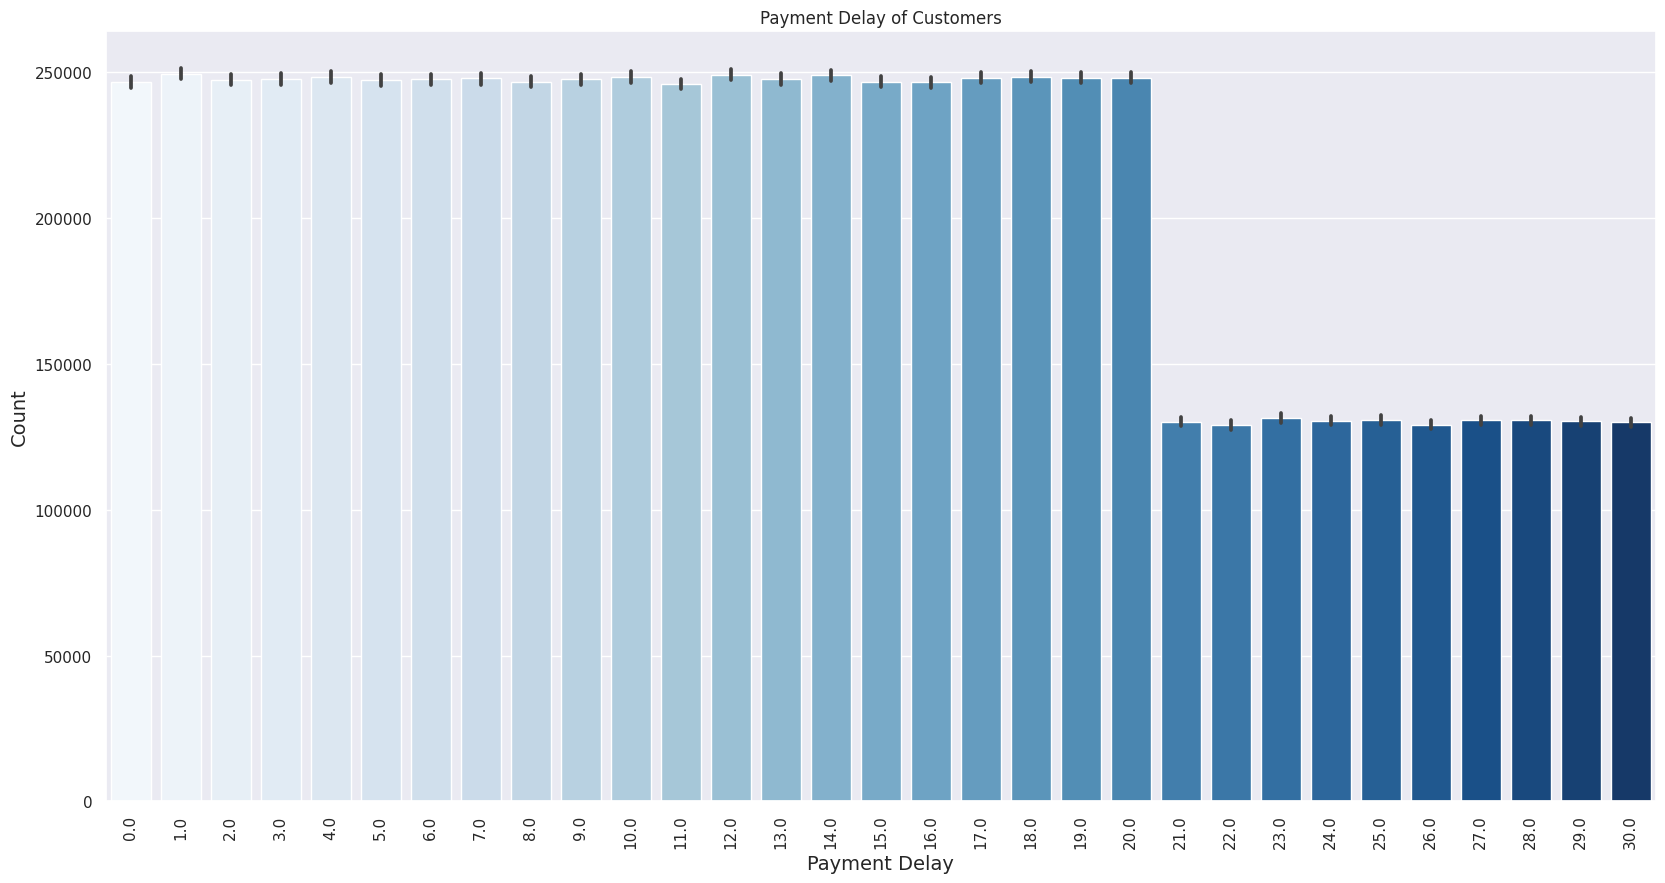

In [107]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Payment Delay', y='CustomerID', data=train, palette='Blues')
plt.xlabel('Payment Delay',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Payment Delay of Customers')
plt.xticks(rotation=90)
plt.show()

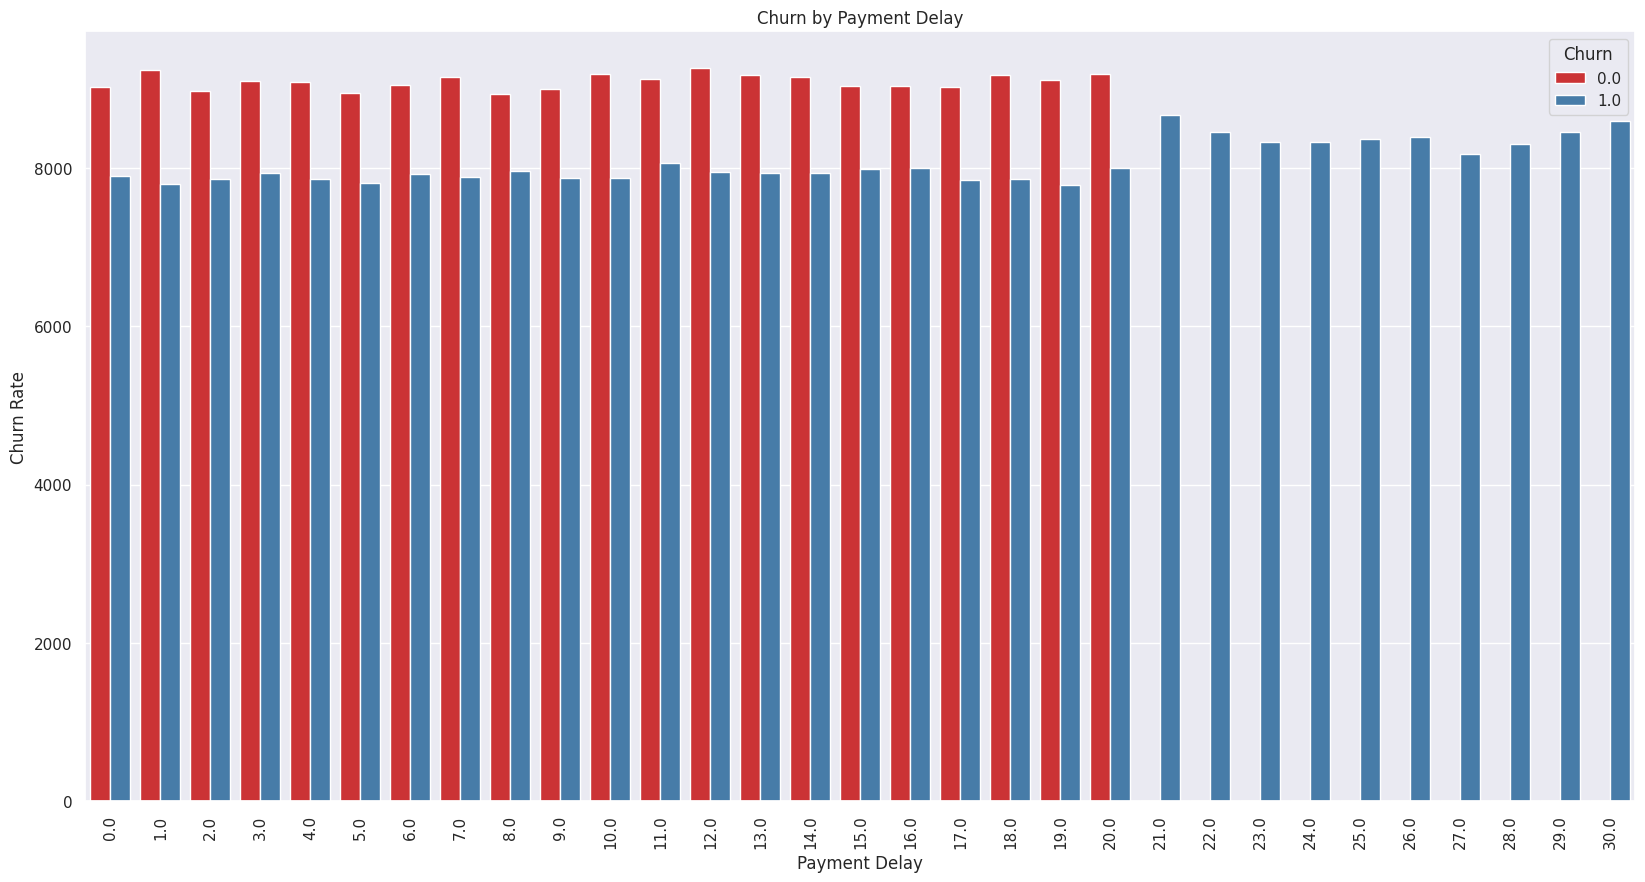

In [108]:
plt.figure(figsize = (20,10))
sns.countplot(data = train , x = 'Payment Delay' , hue = 'Churn', palette ='Set1')
plt.xlabel('Payment Delay')
plt.ylabel('Churn Rate')
plt.title('Churn by Payment Delay')
plt.xticks(rotation=90)
plt.show()

Customers mainly delay payments for less than 20 months, customers who pay more than 20 months late leave completely

Text(0.5, 1.0, 'Distribution Total Spend')

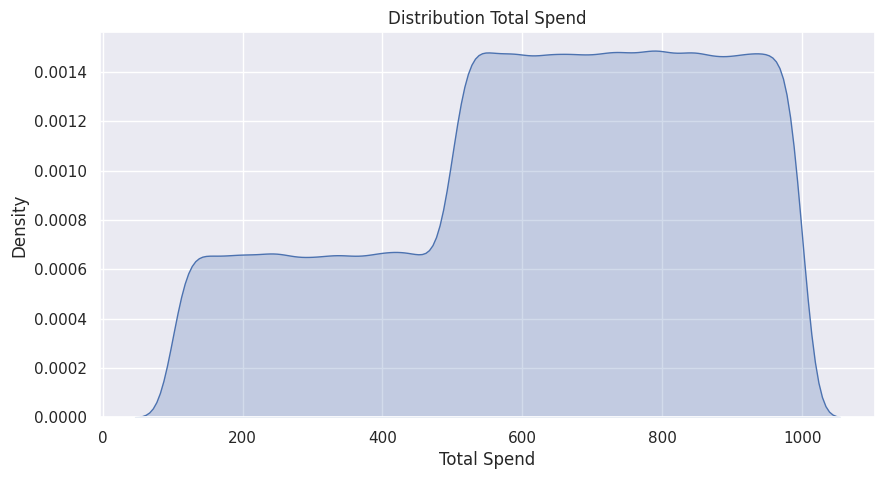

In [69]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = train , x = 'Total Spend' , fill = True, common_norm=False )
plt.title('Distribution Total Spend')

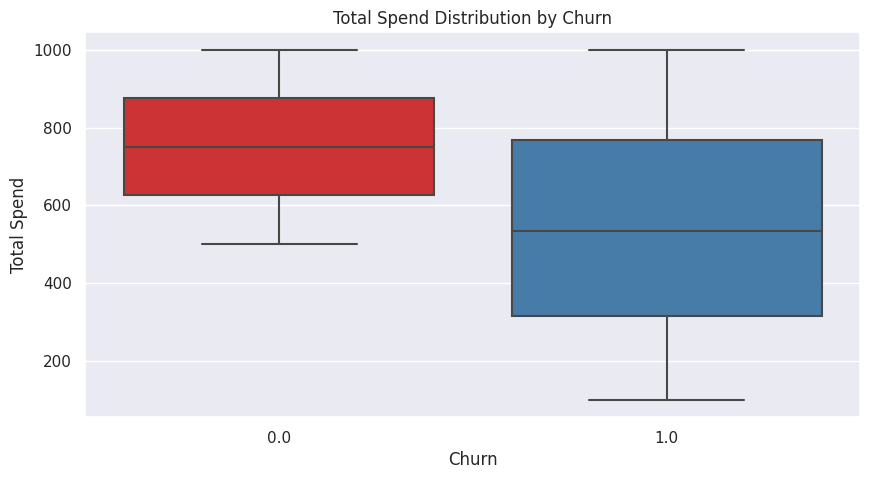

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Churn', y='Total Spend', data=train, palette='Set1')
plt.xlabel('Churn')
plt.ylabel('Total Spend')
plt.title('Total Spend Distribution by Churn')
plt.show()

Total customer spending is mainly in the range of $500 - $1000, customers with total spending less than $500 leave completely

Text(0.5, 1.0, 'Distribution of Last Interaction')

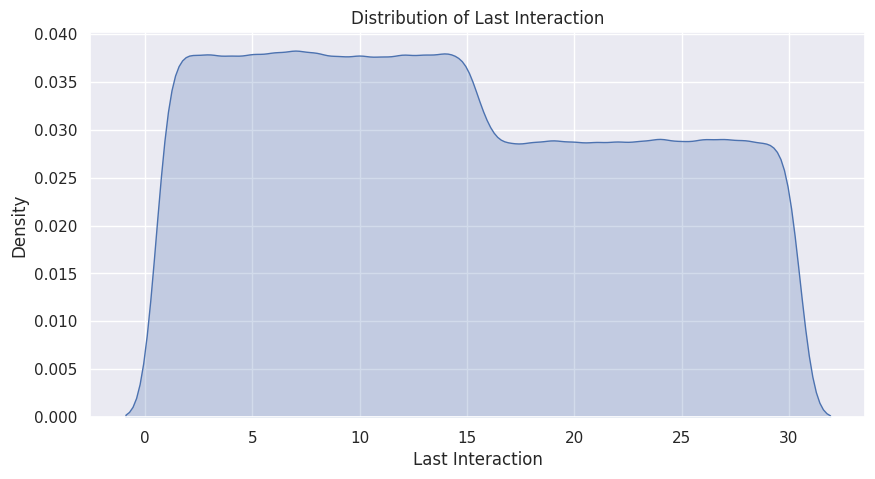

In [71]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = train , x = 'Last Interaction' , fill = True, common_norm=False )
plt.title('Distribution of Last Interaction')

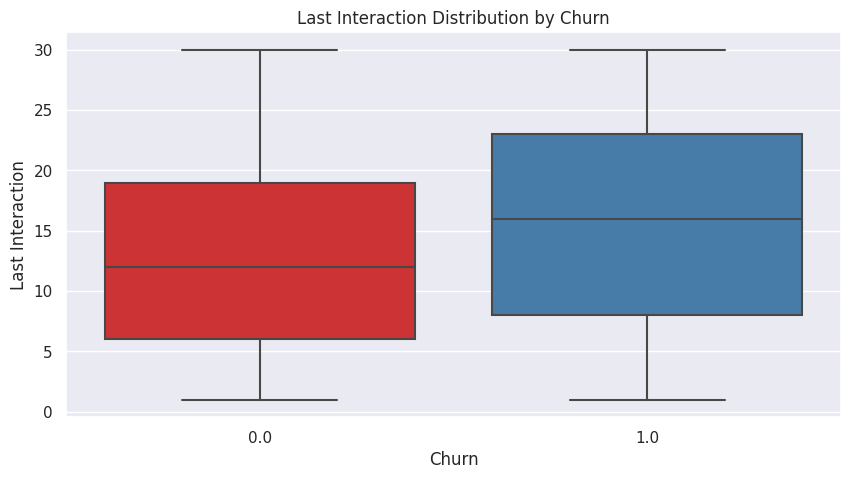

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Churn', y='Last Interaction', data=train, palette='Set1')
plt.xlabel('Churn')
plt.ylabel('Last Interaction')
plt.title('Last Interaction Distribution by Churn')
plt.show()

Customer last interaction times are distributed quite evenly, with a bit higher between 0 and 15, customers with different last interactions have similar churn rates

In [ ]:
train = train.drop("CustomerID", axis=1)

In [ ]:
test = test.drop("CustomerID",axis=1)

Text(0.5, 1.0, 'Correlations between Features and Churn on Train')

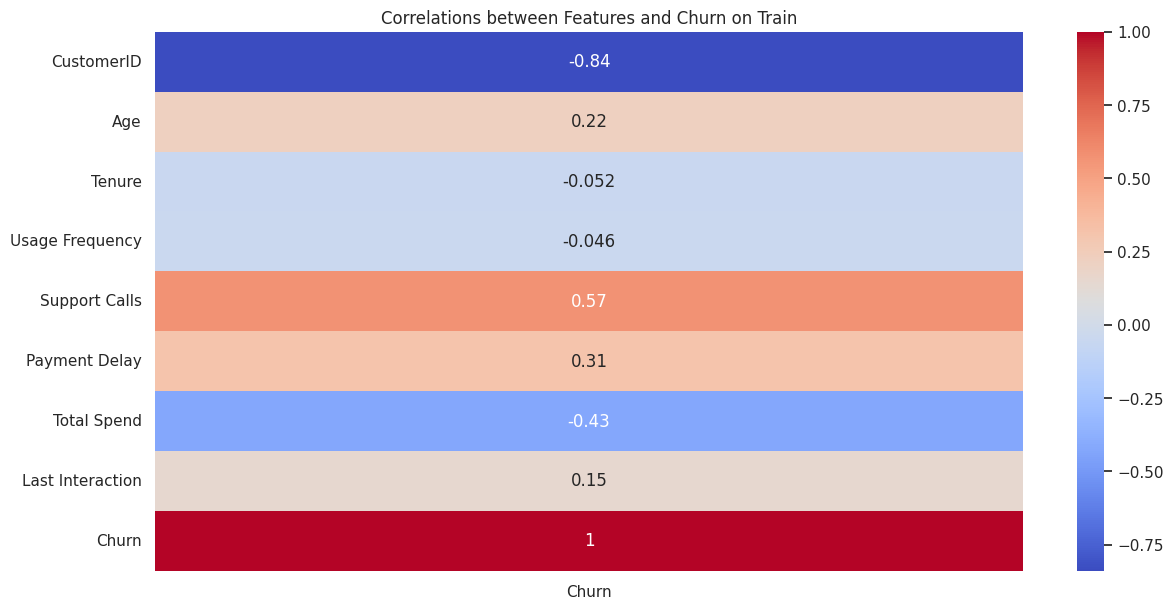

In [73]:
plt.figure(figsize=(14,7))
matrix_train = train.corr(numeric_only=True)
sns.heatmap(matrix_train[["Churn"]], annot=True, cmap='coolwarm')
plt.title('Correlations between Features and Churn on Train')

Text(0.5, 1.0, 'Correlations between Features and Churn on Test')

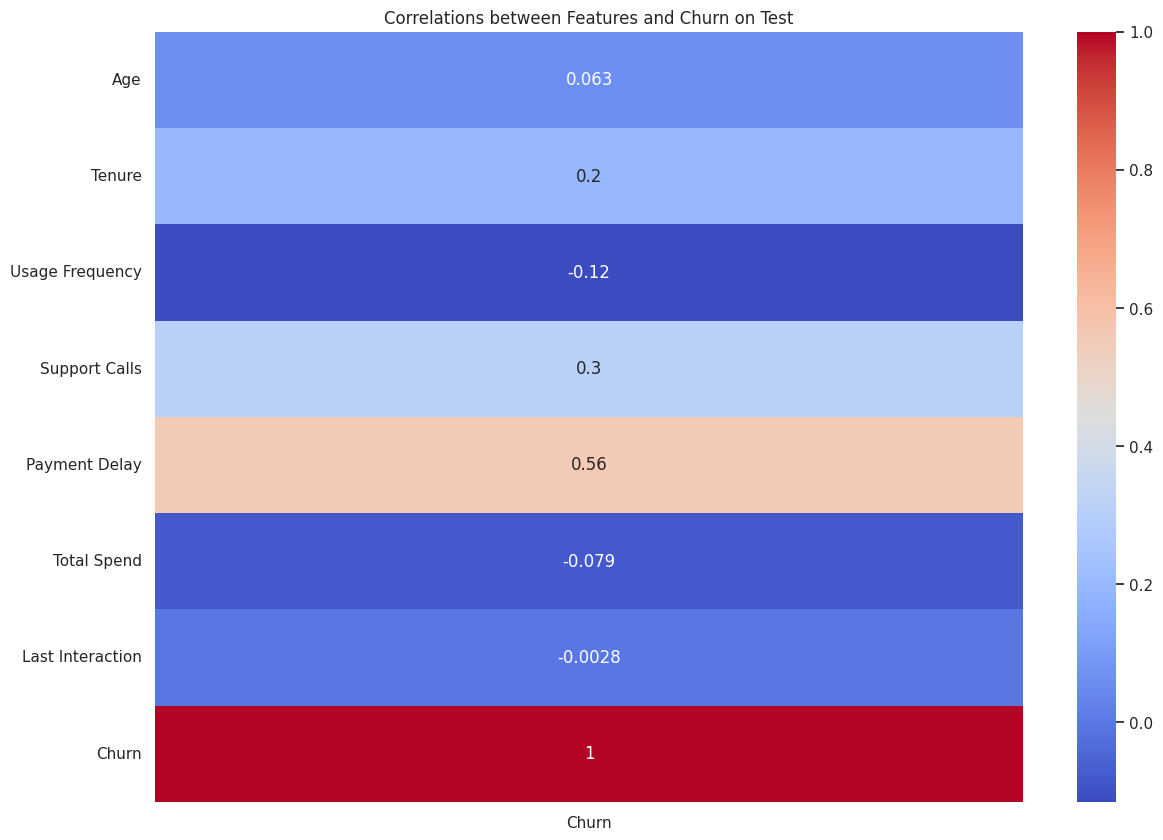

In [ ]:
plt.figure(figsize=(14,10))
matrix_test = test.corr(numeric_only=True)
sns.heatmap(matrix_test[["Churn"]], annot=True, cmap='coolwarm')
plt.title('Correlations between Features and Churn on Test')

In [ ]:
train = train.drop("AgeGroup",axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
train[["Gender","Subscription Type","Contract Length","Churn"]] = train[["Gender","Subscription Type","Contract Length","Churn"]].apply(LabelEncoder().fit_transform)

In [ ]:
train

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0,1
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0,1
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0,1
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0,1
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0,0
440829,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0,0
440830,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0,0
440831,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0,0


In [ ]:
test[["Gender","Subscription Type","Contract Length","Churn"]] = test[["Gender","Subscription Type","Contract Length","Churn"]].apply(LabelEncoder().fit_transform)

In [ ]:
test

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,0,757,21,0
3,35,1,9,12,5,17,1,2,232,18,0
4,53,0,58,24,9,2,2,0,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,2,947,14,1
64370,37,1,6,1,5,22,2,0,923,9,1
64371,25,1,39,14,8,30,1,1,327,20,1
64372,50,0,18,19,7,22,2,1,540,13,1


In [ ]:
x_train = train.drop("Churn",axis=1)
y_train = train['Churn']
x_test = test.drop("Churn",axis=1)
y_test = test["Churn"]

In [ ]:
x_train.shape

(440832, 10)

In [ ]:
x_test.shape

(64374, 10)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logis_start_time = time.time()
logis = LogisticRegression()
logis.fit(x_train,y_train)
logis_end_time = time.time()
logis_training_time = logis_end_time - logis_start_time
y_pred = logis.predict(x_test)

In [ ]:
print(logis_training_time)

0.2557556629180908


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.6912728741417342


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65     33881
           1       0.63      0.86      0.72     30493

    accuracy                           0.69     64374
   macro avg       0.72      0.70      0.69     64374
weighted avg       0.72      0.69      0.68     64374



Text(0.5, 19.049999999999997, 'Du bao')

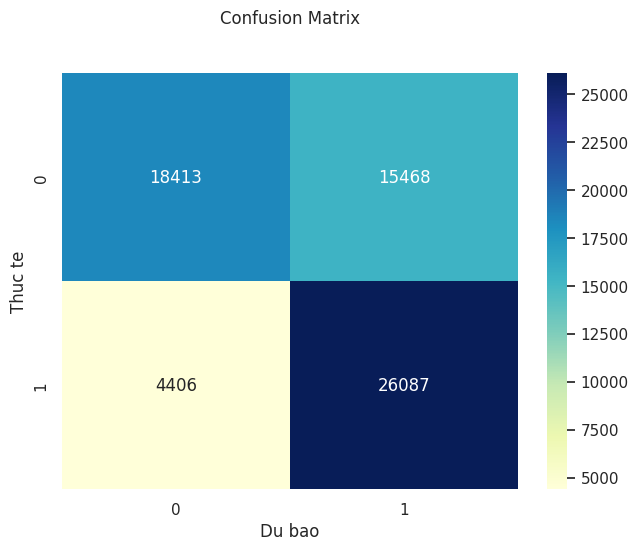

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_start_time = time.time()
GNB = GaussianNB()
GNB.fit(x_train,y_train)
GNB_end_time = time.time()
GNB_training_time = GNB_end_time - GNB_start_time
y_pred1 = GNB.predict(x_test)

In [ ]:
print(GNB_training_time)

0.0942535400390625


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred1))

Accuracy:  0.6357846335477056


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.39      0.53     33881
           1       0.57      0.90      0.70     30493

    accuracy                           0.64     64374
   macro avg       0.70      0.65      0.62     64374
weighted avg       0.70      0.64      0.61     64374



Text(0.5, 19.049999999999997, 'Du bao')

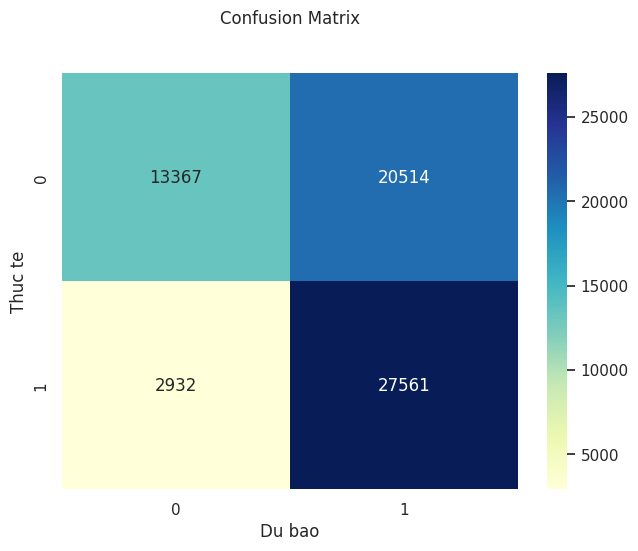

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred1)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn import tree
DT_start_time = time.time()
DT = tree.DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_end_time = time.time()
DT_training_time = DT_end_time - DT_start_time
y_pred2 = DT.predict(x_test)

In [ ]:
print(DT_training_time)

1.2944531440734863


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred2))

Accuracy:  0.531596607325939


In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.14      0.23     33881
           1       0.50      0.97      0.66     30493

    accuracy                           0.53     64374
   macro avg       0.67      0.55      0.45     64374
weighted avg       0.68      0.53      0.44     64374



Text(0.5, 19.049999999999997, 'Du bao')

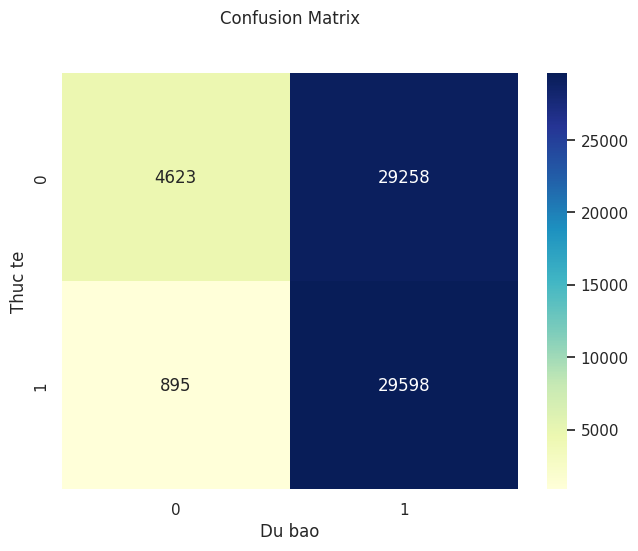

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred2)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_start_time = time.time()
RF = RandomForestClassifier(n_estimators=10)
RF.fit(x_train,y_train)
RF_end_time = time.time()
RF_training_time = RF_end_time - RF_start_time
y_pred3 = RF.predict(x_test)

In [ ]:
print(RF_training_time)

3.685544967651367


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred3))

Accuracy:  0.5322801130891354


In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.14      0.24     33881
           1       0.50      0.97      0.66     30493

    accuracy                           0.53     64374
   macro avg       0.67      0.55      0.45     64374
weighted avg       0.68      0.53      0.44     64374



Text(0.5, 19.049999999999997, 'Du bao')

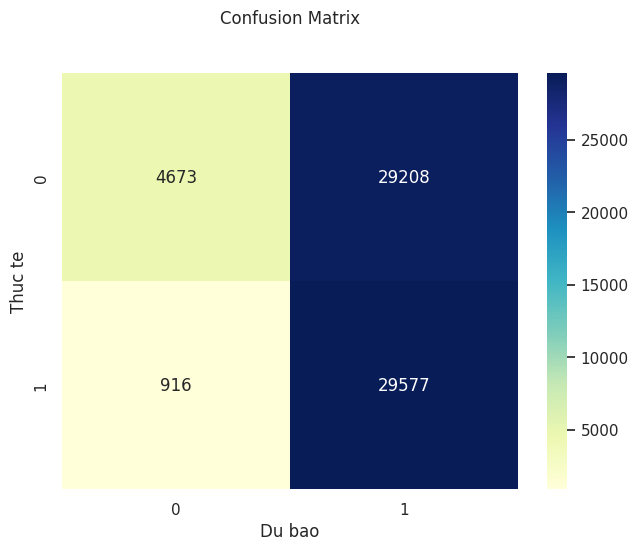

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred3)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_start_time = time.time()
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
KNN_end_time = time.time()
KNN_training_time = KNN_end_time - KNN_start_time
y_pred4 = KNN.predict(x_test)

In [ ]:
print(KNN_training_time)

2.1363630294799805


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred4))

Accuracy:  0.5731817193276789


In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.75      0.29      0.41     33881
           1       0.53      0.89      0.66     30493

    accuracy                           0.57     64374
   macro avg       0.64      0.59      0.54     64374
weighted avg       0.64      0.57      0.53     64374



Text(0.5, 19.049999999999997, 'Du bao')

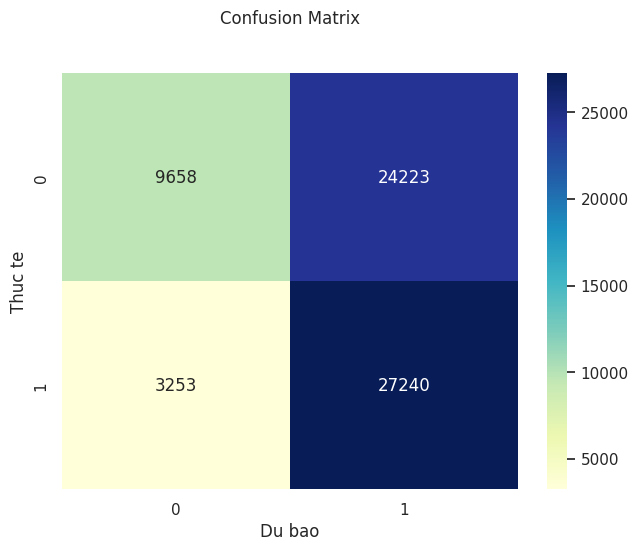

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred4)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bag_start_time = time.time()
bag = BaggingClassifier(LogisticRegression(),random_state=20)
bag.fit(x_train,y_train)
bag_end_time = time.time()
bag_training_time = bag_end_time - bag_start_time
y_pred5 = bag.predict(x_test)

In [ ]:
print(bag_training_time)

2.7743005752563477


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred5))

Accuracy:  0.691474819026315


In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65     33881
           1       0.63      0.86      0.72     30493

    accuracy                           0.69     64374
   macro avg       0.72      0.70      0.69     64374
weighted avg       0.72      0.69      0.69     64374



Text(0.5, 19.049999999999997, 'Du bao')

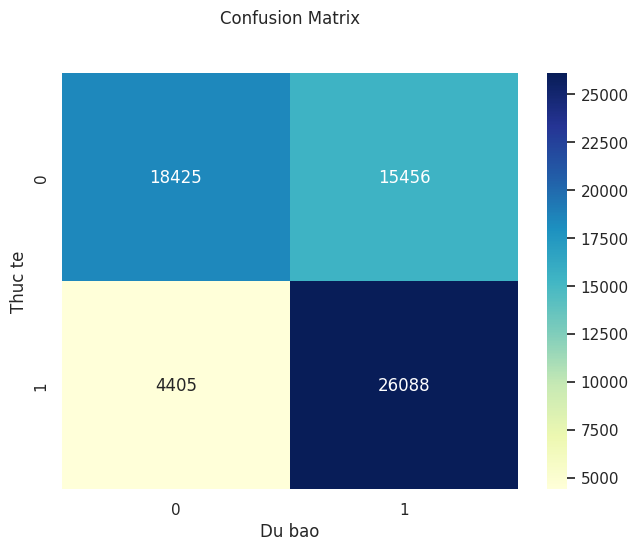

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred5)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")